## Central Limit Theorem

The [central limit theorem](https://en.wikipedia.org/wiki/Central_limit_theorem) is a key result in probability theory that helps explain why normal, or Gaussian, distributions are so omnipresent. The setup is that you have distributions for $N$ random variables $x_i$ and you want to know the distribution of $q = \sum_{i=1}^{N} x_i$. Think of each $x_i$ as coming from it's own distribution like in the figure below. For instance, $x_1$ might be the weight of spoons, $x_2$ the weight of forks, $x_3$ the weight of bowls, ..., and $x_N$ of plates in your kitchen. Then $q$ would represent the total weight when you have one of each of those objects. The distribution of weights for each object might be weird because you have some mix-and-match set of silverware from your parents, grandparents, IKEA, and the thrift shop. The *central limit theorem* says that if you have enough objects (i.e. $N$ is large), then $q$ has a normal (Gaussian) distribution.

![](Central_limit_theorem.png)

Moreover, the central limit theorem states that the mean value of $q$ is given by

\begin{equation}
\mu_{q} = \sum_{i=1}^{N} \mu_{x_i} 
\end{equation}

and the variance (standard deviation squared) is given by

\begin{equation}
\sigma_{q}^{2} = \sum_{i=1}^{N} \sigma^2_{x_i} 
\end{equation}

*if you are having problems with the math displaing, click [here](http://nbviewer.jupyter.org/github/cranmer/intro-exp-phys-II/blob/master/Central-Limit-Theorem.ipynb?flush_cache=true)*

The mean probably isn't surprising because $q$ is just a sum and the integral the defines the mean just distributes across each term. Also, the equation for the variance is the same as the propagation of errors formula we use when we add different measurements together. However, that propoagation of errors formula is derived from the Central Limit Theorem, not vice versa.

### This is a collaborative project

In this repository there is a folder called `distributions` with several python files. The idea is that each student will create one of these python files and we will use GitHub to collect them. Each of these files has a python class that describes a probability distribution.  Each of these classes will define:
   * `x_min, x_max, f_max` - used for the accept/reject Monte Carlo sampling algorithm
   * `pdf()` - the probability density function
   * `mean()` - the mean of the pdf
   * `std()` - the standard deviation of the pdf
   
In addition, each of these python classes inherits from `BaseDistribution` which knows how to run the accept/reject algorithm using the information above ([see inside](distributions/base_distribution.py) ). In order to generate `n_samples` from the pdf, you simply call `dist.rvs(n_samples)`, where `dist` is an instance of one of these python classes.

**Naming Convention**: Name your file `Dist_<netid>.py` and your distribution the same way (without the `.py`). If you want to contribute more than one distribution, you can can add `Dist_<netid>_<index>.py`, where `<index>` is 1,2,3,...

Here's an example:

In [1]:
!cat distributions/Dist_kc90.py

'cat' is not recognized as an internal or external command,
operable program or batch file.


## Example usage of the distributions

Ok, now let's use them. So far there are only two distributions, but there will be more soon.

In [2]:
%pylab inline --no-import-all
from scipy.stats import norm #will use this for plotting

Populating the interactive namespace from numpy and matplotlib


In [3]:
# import all our distributions
import distributions

In [4]:
# some funny python to make a list of all the distributions for convenience
all_distributions_dict = dict([(name, cls) for name, cls in distributions.__dict__.items() if isinstance(cls, type)])
all_distributions_list = [(cls) for name, cls in distributions.__dict__.items() if isinstance(cls, type)]
# print out their names
all_distributions_dict.keys()

dict_keys(['Dist_sar653_1', 'Dist_yr595', 'Dist_recast', 'Dist_mh3908', 'Dist_yz2668', 'Dist_nj18', 'Dist_ry643', 'Dist_hk1764', 'Dist_ih646', 'Dist_my1462', 'Dist_ac5790', 'Dist_ae1389', 'Dist_kc90_2', 'Dist_msc565', 'Dist_jsg549', 'Dist_ejk483', 'Dist_kc90_3', 'Dist_sm6376', 'Dist_rdr335', 'Dist_saw533', 'Dist_jgc375', 'Dist_kw1621', 'Dist_az1332', 'Dist_vag273', 'Dist_jn1348', 'Dist_kjm538', 'Dist_dl3185', 'Dist_psa251', 'Dist_vag273_1', 'Dist_pc1727', 'Dist_ptf223', 'Dist_vag273_2', 'Dist_jeg535', 'Dist_ams1396', 'Dist_psa251_2'])

In [5]:
len(all_distributions_dict.keys())

35

In [6]:
## Do tests
ok_distributions_list=[]
problems=[]
for i, cls in enumerate(all_distributions_list):
    #print(cls)
    try:
        dist = cls()
        N_test = 100000
        #print('will try to generate for %s' %(cls.__name__))
        if dist.pdf(dist.x_min + .3*(dist.x_max-dist.x_min)) < 1E-3:
            print("may have a problem")
            continue
            
        rvs = dist.rvs(N_test)
        if np.abs(np.mean(rvs) - dist.mean()) > 5*np.std(rvs)/np.sqrt(N_test):
            print("means don't match for %s: %f vs. %f" %(cls.__name__, 
                                                          np.mean(rvs), dist.mean()))
            continue
            
        elif np.abs(np.std(rvs) - dist.std()) > 5*np.std(rvs)/np.sqrt(np.sqrt(1.*N_test)):
            print("std devs. don't match for %s: %f vs. %f" %(cls.__name__, 
                                                          np.std(rvs), dist.std()))
            continue
        elif np.abs(np.std(rvs) - dist.std()) / dist.std() > 0.1:
            print("std devs. don't match for %s: %f vs. %f" %(cls.__name__, 
                                                          np.std(rvs), dist.std()))
            continue
        
        elif np.sum(dist.pdf(np.linspace(dist.x_min,dist.x_max,100))<0) > 0:
            print("pdf was negative in some places")
            continue                    

        else:
            print("%s passes tests, adding it" %(cls.__name__))
            ok_distributions_list.append(cls)
    except:
        print("%s has errors, does't work" %(cls.__name__))
        continue

print("list of ok distributions:",[i.__name__ for i in ok_distributions_list])




Dist_az1332 passes tests, adding it
Dist_yr595 passes tests, adding it
Dist_recast passes tests, adding it
Dist_nj18 passes tests, adding it
Dist_hk1764 passes tests, adding it
Dist_kjm538 passes tests, adding it
Dist_msc565 passes tests, adding it
Dist_sm6376 passes tests, adding it
Dist_kc90_2 passes tests, adding it
std devs. don't match for Dist_jgc375: 13.718240 vs. 15.655860
Dist_jsg549 passes tests, adding it
Dist_my1462 passes tests, adding it
std devs. don't match for Dist_rdr335: 0.399921 vs. 0.100000
may have a problem
Dist_vag273_2 passes tests, adding it
std devs. don't match for Dist_vag273_1: 0.144151 vs. 0.288675
means don't match for Dist_mh3908: 0.854808 vs. 2.364890
Dist_yz2668 passes tests, adding it
Dist_ry643 passes tests, adding it
Dist_ih646 passes tests, adding it
Dist_ae1389 has errors, does't work
Dist_ac5790 passes tests, adding it
Dist_ejk483 passes tests, adding it
Dist_kc90_3 passes tests, adding it
means don't match for Dist_jeg535: -3.311881 vs. 0.07200

In [7]:
problems = [x for x in all_distributions_list if x not in ok_distributions_list]
[i.__name__ for i in problems]

['Dist_jgc375',
 'Dist_rdr335',
 'Dist_ams1396',
 'Dist_vag273_1',
 'Dist_mh3908',
 'Dist_ae1389',
 'Dist_jeg535',
 'Dist_sar653_1',
 'Dist_vag273',
 'Dist_dl3185',
 'Dist_ptf223',
 'Dist_pc1727']

In [8]:
# how many samples for plots?
n_samples = 100000

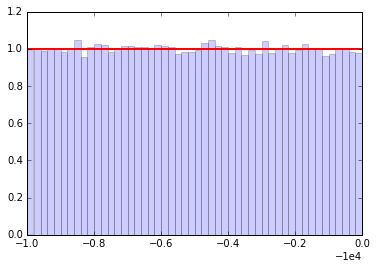

In [9]:
# Here's an example of usage
dist = distributions.Dist_ac5790()
rvs = dist.rvs(n_samples)
counts, bins, edges = plt.hist(rvs, bins=50, normed=True, alpha =0.2)
y = []
for bin in bins:
    y.append(dist.pdf(bin))
plt.plot(bins, y, c='r', lw=2)

In [10]:
dist.std()

0.28867513459481287

## Let's inspect all the distributions we have

Here we will loop over the different distributions and make a plot like the one above

Dist_az1332: std from samples = 0.88, std from dist = 0.89
Dist_yr595: std from samples = 0.50, std from dist = 0.50
Dist_recast: std from samples = 5.40, std from dist = 5.40
Dist_nj18: std from samples = 0.71, std from dist = 0.71
Dist_hk1764: std from samples = 0.51, std from dist = 0.51
Dist_kjm538: std from samples = 1.26, std from dist = 1.26
Dist_msc565: std from samples = 0.27, std from dist = 0.27
Dist_sm6376: std from samples = 0.29, std from dist = 0.29
Dist_kc90_2: std from samples = 0.29, std from dist = 0.29
Dist_jsg549: std from samples = 0.49, std from dist = 0.49
Dist_my1462: std from samples = 16.19, std from dist = 16.20
Dist_vag273_2: std from samples = 0.30, std from dist = 0.30
Dist_yz2668: std from samples = 0.28, std from dist = 0.28
Dist_ry643: std from samples = 0.33, std from dist = 0.33
Dist_ih646: std from samples = 0.19, std from dist = 0.19
Dist_ac5790: std from samples = 0.29, std from dist = 0.29
Dist_ejk483: std from samples = 0.24, std from dist = 0.2

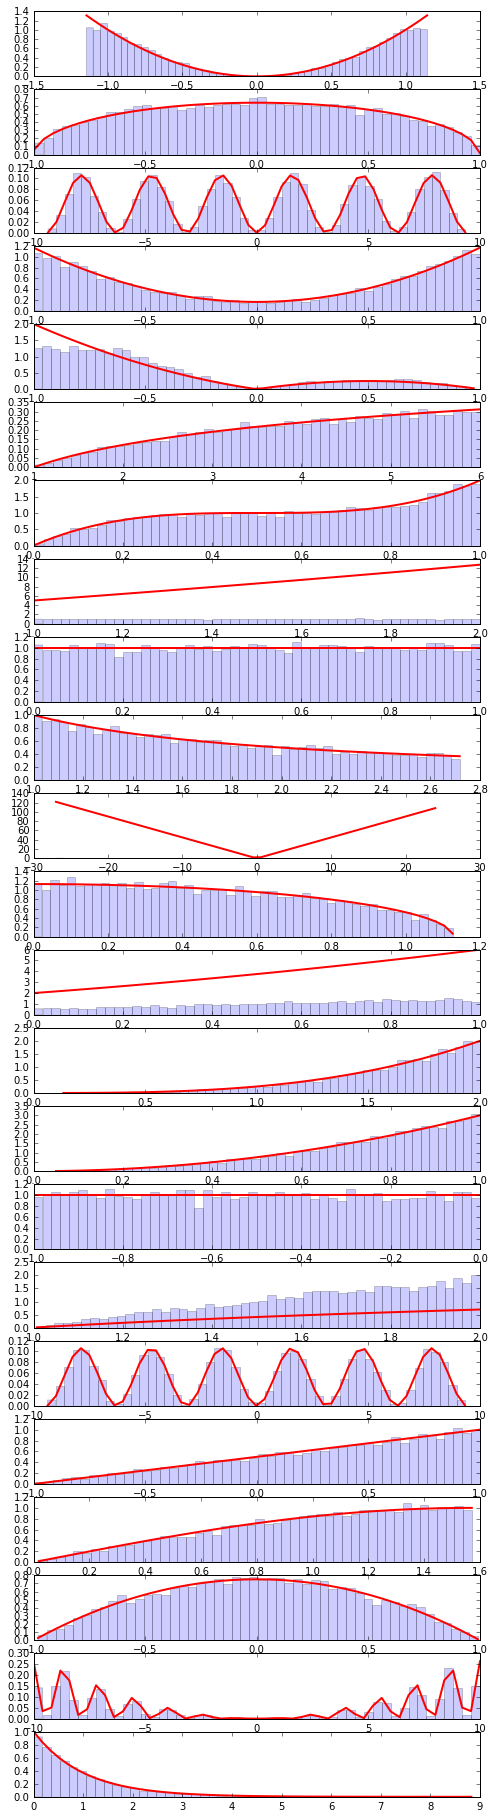

In [11]:
fig = plt.figure(figsize=2*plt.figaspect(len(ok_distributions_list)))
for i, cls in enumerate(ok_distributions_list):
    dist = cls()
    rvs = dist.rvs(10000)
    ax = fig.add_subplot(len(ok_distributions_list),1,i+1)
    counts, bins, patches = ax.hist(rvs, bins=50, normed=True, alpha=0.2)
    # depending on how you code up your pdf() function, numpy might not
    # be able to "broadcast" (apply the function for each element of a numpy array)
    # but this should always wrok
    y = []
    for bin in bins:
        y.append(dist.pdf(bin))
        
    # ok, now plot it
    plt.plot(bins, y, c='r', lw=2)
    
    # and let's check if the distribution is ok
    print("%s: std from samples = %.2f, std from dist = %.2f" %(cls.__name__,np.std(dist.rvs(n_samples)), dist.std()))
    if np.abs(np.std(dist.rvs(n_samples)) - dist.std()) / dist.std() > 0.1:
        print("looks like a problem with this distribution: ", cls)

## Demonstration of the Central Limit Theorem

ok, let's use one of the distributions to demonstrate the central limit theorem. We will use the same distribution $N$ times.

First let's make a little helper function.

In [12]:
def do_convolution(dist, N):
    n_samples = 10000
    q = np.zeros(n_samples)
    var_q = 0.
    mean_q = 0.

    for i in range(N):
        q = q+dist.rvs(n_samples)
        var_q = var_q + dist.std()**2
        mean_q = mean_q + dist.mean()

    std_q = np.sqrt( var_q )


    counts, bins, patches = plt.hist(q,bins=50, normed=True, alpha=.2)
    plt.plot(bins, norm.pdf(bins,loc=mean_q, scale=std_q), lw=2, c='r')

Now let's use it for $N=\{2,4,32\}$

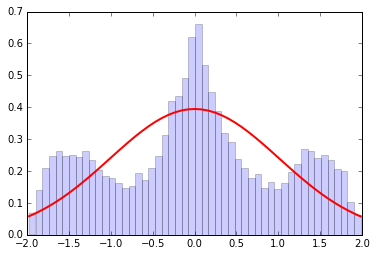

In [13]:
dist = distributions.Dist_nj18()
do_convolution(dist,2)

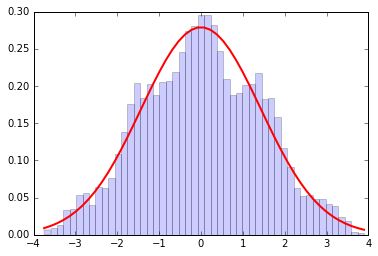

In [14]:
do_convolution(dist,4)

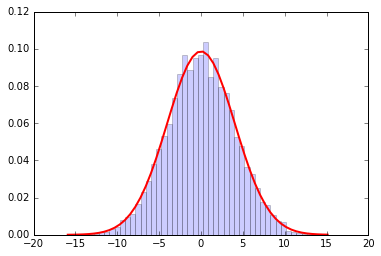

In [15]:
do_convolution(dist,32)

*Gorgeous!*

## Now let's do the same thing randomly using different distributions 

To do this we will use `np.random.choice` to randomly choose from our list. Here's an example

In [16]:
np.random.choice(['a','b','c','d'], 10)

array(['d', 'a', 'c', 'c', 'a', 'c', 'a', 'b', 'd', 'd'], 
      dtype='<U1')

Now let's make a variation on the helper function above

In [17]:
def do_random_convolution(list_of_distributions, N):
    n_samples = 10000
    q = np.zeros(n_samples)
    var_q = 0.
    mean_q = 0.

    for dist_class in np.random.choice(list_of_distributions,N):
        dist = dist_class()
        print(dist_class.__name__, dist.std())
        q = q+dist.rvs(n_samples)
        var_q = var_q + dist.std()**2
        mean_q = mean_q + dist.mean()

    std_q = np.sqrt( var_q )


    counts, bins, patches = plt.hist(q,bins=50, normed=True, alpha=.2)
    plt.plot(bins, norm.pdf(bins,loc=mean_q, scale=std_q), lw=2, c='r')

Dist_kc90_2 0.288675134595
Dist_yz2668 0.275


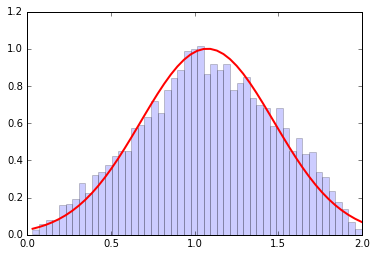

In [18]:
do_random_convolution(ok_distributions_list,2)

Dist_ac5790 0.288675134595
Dist_my1462 16.2
Dist_ejk483 0.24
Dist_jsg549 0.491971144939


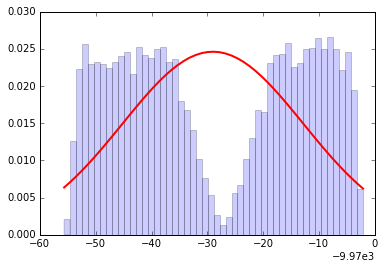

In [19]:
do_random_convolution(ok_distributions_list,4)

Dist_jsg549 0.491971144939
Dist_ac5790 0.288675134595
Dist_msc565 0.270801280155
Dist_nj18 0.714920352984


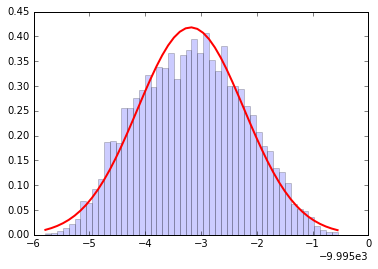

In [20]:
do_random_convolution(ok_distributions_list,4)

Dist_ih646 0.19364916731
Dist_ry643 0.326598632371
Dist_az1332 0.88669
Dist_yz2668 0.275
Dist_saw533 0.471404520791
Dist_kw1621 7.61880531394
Dist_yz2668 0.275
Dist_yz2668 0.275
Dist_ih646 0.19364916731
Dist_nj18 0.714920352984
Dist_vag273_2 0.3
Dist_yr595 0.5
Dist_msc565 0.270801280155
Dist_kc90_3 5.39525840005
Dist_jsg549 0.491971144939
Dist_hk1764 0.51
Dist_jn1348 0.376287992885
Dist_kjm538 1.25593971214
Dist_ih646 0.19364916731
Dist_vag273_2 0.3
Dist_psa251_2 1.0
Dist_yz2668 0.275
Dist_my1462 16.2
Dist_recast 5.39525840005
Dist_ejk483 0.24
Dist_recast 5.39525840005
Dist_psa251_2 1.0
Dist_nj18 0.714920352984
Dist_jn1348 0.376287992885
Dist_msc565 0.270801280155
Dist_ac5790 0.288675134595
Dist_msc565 0.270801280155


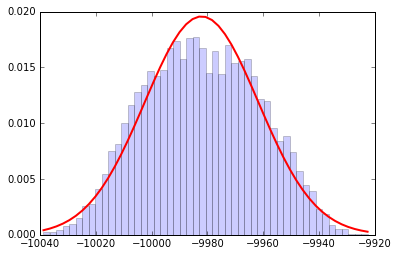

In [21]:
do_random_convolution(ok_distributions_list,32)

# Part 2 of project

## a) preliminaries
From either master or the branch you used to submit your distribution, update so that you have the current version of `cranmer/intro-exp-phys-II`.

You can either do this in GitHub desktop by finding the button near the top left or by typing this:
```
git fetch cranmer master
git merge cranmer/master
```

Now Create a new branch called "part2"


## b) execute the notebook above

## c) Make a $\chi^2$ function

Below is a copy of the `do_random_convolution` function with a new name. Modify it so taht it returns the chi-square quantity that says how closely the observed distribution matches the prediction from the Central Limit theorem.

YOu might want to check out the [chi-square-of-distribution](chi-square-of-distribution.ipynb) notebook

In [183]:
def do_random_convolution_with_chi2(list_of_distributions, N):
    n_samples = 500
    q = np.zeros(n_samples)
    var_q = 0.
    mean_q = 0.

    for dist_class in np.random.choice(list_of_distributions,N):
        dist = dist_class()
        q = q+dist.rvs(n_samples)
        var_q = var_q + dist.std()**2
        mean_q = mean_q + dist.mean()
        
    std_q = np.sqrt( var_q )
    
    counts, bins, patches = plt.hist(q, bins=n_samples, normed=False)
    bin_centers = (bins[1:]+bins[:-1])/2
    bin_width = bins[1]-bins[0]
    normalization = q.size*(bin_width)
    prediction = normalization*norm.pdf(bin_centers, loc=mean_q, scale=std_q)
    plt.plot(bin_centers, prediction, c='r', lw=2)
    
    from scipy.stats import chisquare
    from scipy.stats import chi2
    chisq_obs=np.sum((counts-prediction)**2/prediction)
    print("Chi-squared value:", chisq_obs)
    pvalue= chi2.sf(chisq_obs,counts.size)
    print("Probability value:", pvalue)

## d) Make a plot

Plot the $\chi^2$ quantity vs. N for N=2,4,8,16,32

## e) push a new version of this notebook to GitHub

Execute the notebook, get your plots, save it, commit the changes to the `part2` branch, and then push (sync) to GitHub.com.  When you are done, make a new pull request.



Chi-squared value: 572.722525098
Probability value: 0.0132899579025


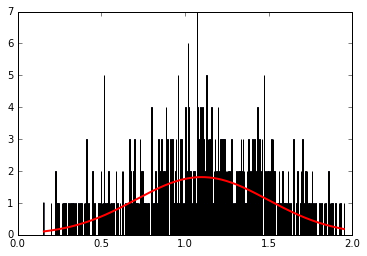

In [184]:
do_random_convolution_with_chi2(ok_distributions_list,2)

Chi-squared value: 982.162384761
Probability value: 1.0400504451e-33


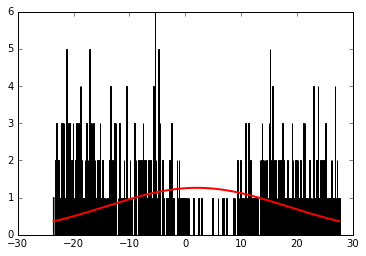

In [185]:
do_random_convolution_with_chi2(ok_distributions_list,4)

Chi-squared value: 534.265700809
Probability value: 0.139907652326


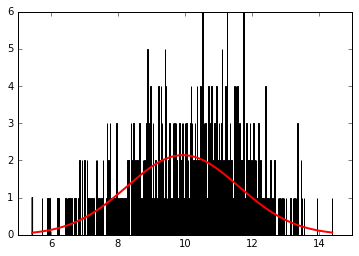

In [186]:
do_random_convolution_with_chi2(ok_distributions_list,8)

Chi-squared value: 772.508240311
Probability value: 5.1950297901e-14


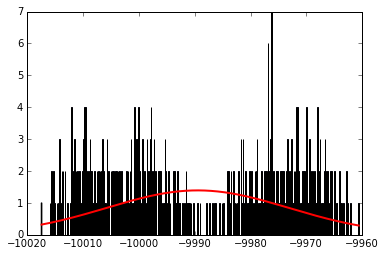

In [187]:
do_random_convolution_with_chi2(ok_distributions_list,16)

Chi-squared value: 487.60739179
Probability value: 0.645815048386


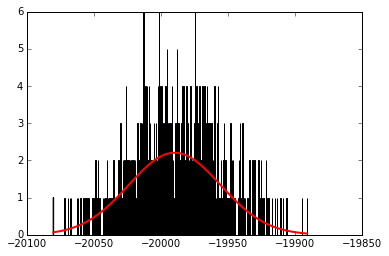

In [188]:
do_random_convolution_with_chi2(ok_distributions_list,32)